In [1]:
%matplotlib inline
import os, csv, sys, collections
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


DATA_DIR = "/home/jingbozhou/Project/CombDrug/runAddMut/8-analysis/rawData/"
OUT_DIR = "/home/jingbozhou/Project/CombDrug/runAddMut/8-analysis/result/"

sig_raw = pd.read_csv(os.path.join(OUT_DIR, "resData/", "All_sig_1.csv"))
sig_raw = sig_raw[(sig_raw["p_value"]<=0.001)&(sig_raw["FDR"]<=0.05)&(np.abs(sig_raw["sign_effectsize"])>=2)].copy()
sig_raw['log10pvalue'] = -(np.log10(sig_raw["p_value"]))
sig_raw["Feat_comb"] = sig_raw["Comb_name"] + "-" + sig_raw["Feat_name"]

sig_ppi = pd.read_csv(os.path.join(OUT_DIR, "resData/", "All_sig_ppi.csv"))
sig_ppi = sig_ppi.drop(columns=["Drug_1_target", "Drug_2_target"])

sig_sel = sig_raw.merge(sig_ppi, left_on=["Comb_name", "Gene_name"], right_on=["Comb_name", "Gene_name"])

In [2]:
def getPPILen(x):
    if pd.isnull(x):
        out_val = "NA"
    else:
        ppi_len = x.split(", ")
        out_val = len(ppi_len) - 1
        if out_val > 5:
            out_val = ">5"
    return out_val

sig_sel["drug_1_gene_len"] = sig_sel["drug_1_gene_path"].apply(getPPILen)
sig_sel["drug_2_gene_len"] = sig_sel["drug_2_gene_path"].apply(getPPILen)

sig_ppi_len = pd.concat([sig_sel[pd.notnull(sig_sel["Drug_1_target"])][["drug_1_gene_len"]].rename(columns={"drug_1_gene_len":"Distance"}), 
                         sig_sel[pd.notnull(sig_sel["Drug_2_target"])][["drug_2_gene_len"]].rename(columns={"drug_2_gene_len":"Distance"})
                        ], axis=0, ignore_index=True)
sig_ppi_len = sig_ppi_len.value_counts().to_frame()
sig_ppi_len = sig_ppi_len.rename(columns={0:"Number"})
sig_ppi_len = sig_ppi_len.loc[["NA"]+list(range(6))+[">5"]]
sig_ppi_len = sig_ppi_len.reset_index()

sig_ppi_len["Percentages"] = sig_ppi_len["Number"] / sig_ppi_len["Number"].sum() * 100

Rectangle(xy=(-0.4, 0), width=0.8, height=4.57237, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=0.0486967, angle=0)
Rectangle(xy=(1.6, 0), width=0.8, height=2.12984, angle=0)
Rectangle(xy=(2.6, 0), width=0.8, height=28.7054, angle=0)
Rectangle(xy=(3.6, 0), width=0.8, height=52.0491, angle=0)
Rectangle(xy=(4.6, 0), width=0.8, height=11.436, angle=0)
Rectangle(xy=(5.6, 0), width=0.8, height=0.922675, angle=0)
Rectangle(xy=(6.6, 0), width=0.8, height=0.135838, angle=0)


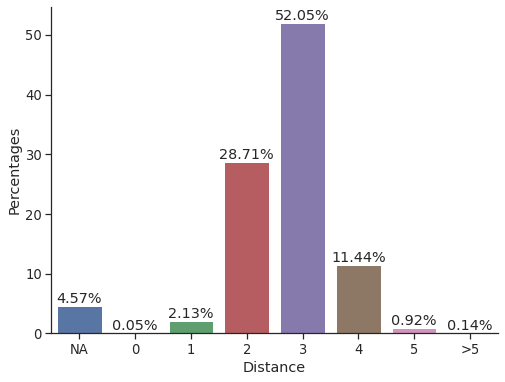

In [3]:
sns.set(style="ticks", font_scale=1.2, rc={'figure.figsize':(8, 6)})

g = sns.barplot(x="Distance", y="Percentages", data=sig_ppi_len)

for p in g.patches:
    print(p)
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2.,height+0.5,"{:.2f}%".format(height),ha="center")
    
#g.set(ylim=(0, 55))
g.spines.right.set_visible(False)
g.spines.top.set_visible(False)

#plt.savefig("./plotRes/_all_ppi_len.svg", format="svg", bbox_inches="tight", transparent=True)